In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from classification_utils import *

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,49.622176,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.058472,0.084281,0.365536,2.680103,1.357545,14.574041
std,0.499031,78.524757,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.230465,0.109621,0.408358,2.353441,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.000000,0.017751,0.136692,0.450561,0.010526,0.104251
50%,1.000000,12.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.000000,0.045752,0.230747,1.945910,0.043478,0.238606
75%,1.000000,55.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.000000,0.088862,0.451218,5.065383,0.949402,24.144412
max,1.000000,291.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,1.386294,0.529903,2.183383,8.187960,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

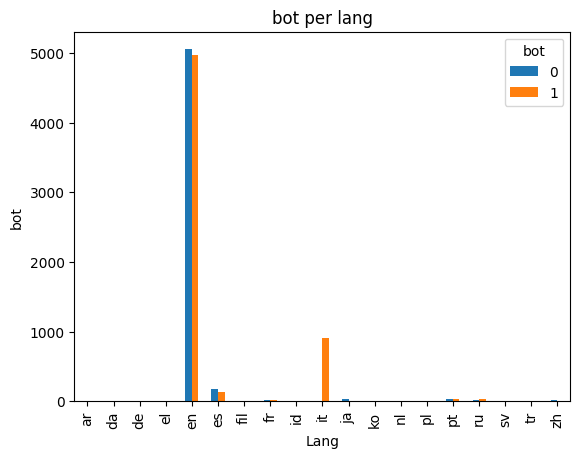

In [6]:
plot_lang_hist(data)

In [7]:
data = discretize_data(data, ["lang"])

In [8]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,4


In [9]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'reply_count_entropy', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [10]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
558061651,291,78.955083,17.232114,0.005109,0.002421,0.000000,0.0,0.0,0.000000,0.050296,0.228188,5.171802,0.105164,1.213812,4
1886647662,8,45.447493,9.705013,0.014776,0.636412,0.045910,0.0,0.0,0.000000,0.045752,0.873762,6.699926,0.043478,54.994074,4
1127910840,35,81.853659,19.219512,0.005109,0.292683,0.070423,0.0,0.0,1.332179,0.045752,0.230747,1.786913,0.043478,157.946233,4
297145972,291,78.707529,17.076379,0.005109,0.000000,0.000000,0.0,0.0,0.000000,0.011144,0.119507,3.510700,0.007883,0.088433,4
1174632889,2,63.666667,18.800000,0.066667,0.000000,0.133333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4


In [11]:
train_label.head()

558061651     1
1886647662    0
1127910840    1
297145972     1
1174632889    0
Name: bot, dtype: int64

### Usage of Lang

In [12]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_set)
test_pred_gnb = gnb.predict(test_set)

In [13]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8321539416511483
Accuracy test set  0.8352157544164495
Precision train set  0.8601083710731247
Recall train set  0.8321539416511483
F1 score train set  0.8269277634792092
Support train set  (array([0.96327467, 0.76916008]), array([0.66719661, 0.97757533]), array([0.78835316, 0.86093396]), array([3774, 4281]))


In [14]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.97      0.67      0.79      1618
         >50       0.77      0.98      0.86      1835

    accuracy                           0.84      3453
   macro avg       0.87      0.83      0.83      3453
weighted avg       0.87      0.84      0.83      3453



In [15]:
# cross validation
scores = cross_validate(gnb, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.004983981450398763
Score time  0.0031359195709228516
Test score  0.8321539416511483
Train score  0.8332091868404717


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


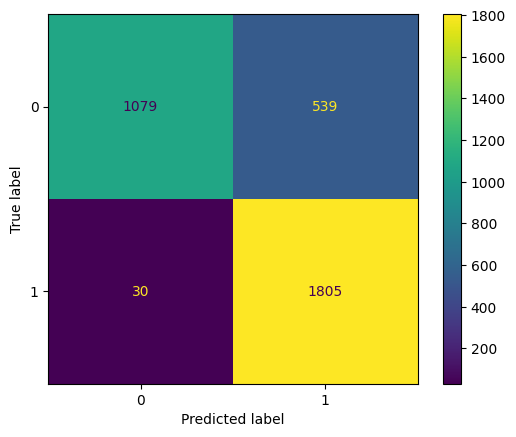

In [16]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_set, test_label)
plt.show() 

In [17]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

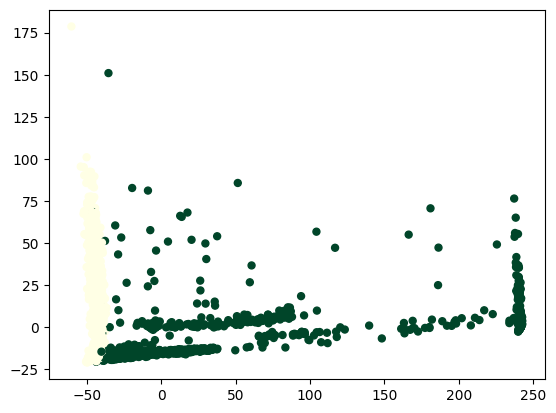

In [18]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

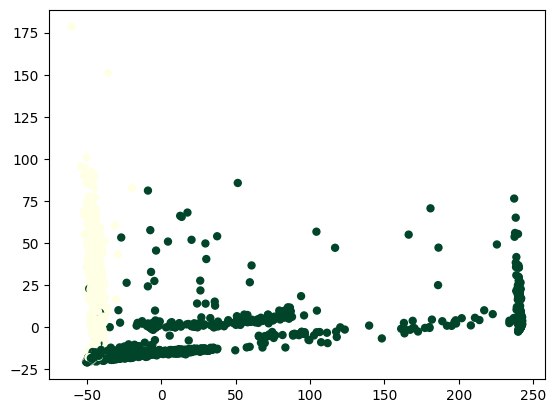

In [19]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');

### How lang is biased

In [20]:
# take a non bot user
non_bot_users = test_set[test_label==0]
total_bot = (test_label==0).sum()

In [21]:
non_bot_users.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
364100451,9,70.943177,15.124430,0.214849,1.032352,0.125259,0.0,0.0,0.0,0.123185,0.405486,5.433396,9.657818,45.405618,4
231225050,11,53.656258,11.383849,0.044684,0.533782,0.038493,0.0,0.0,0.0,0.249529,0.657023,6.410728,2.506326,20.047109,4
2384522161,3,65.836735,14.693878,0.000000,0.357143,0.040816,0.0,0.0,0.0,0.071429,0.257539,1.945910,0.071429,0.257539,4
201113766,11,70.360969,16.227995,0.061911,1.098520,0.070423,0.0,0.0,0.0,0.312786,1.411217,5.788696,0.043478,42.286489,4
114488344,4,72.597015,15.164179,0.005109,0.582090,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.014925,0.121254,5


In [22]:
gnb.predict(non_bot_users).sum()/total_bot

0.3331273176761434

In [23]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.32756489493201485
number bot classified with lang_num = 9 : 0.3695920889987639
number bot classified with lang_num = 7 : 0.3547589616810878
number bot classified with lang_num = 15 : 0.5203955500618047
number bot classified with lang_num = 5 : 0.3374536464771323
number bot classified with lang_num = 17 : 0.6199011124845488
number bot classified with lang_num = 14 : 0.4826946847960445
number bot classified with lang_num = 12 : 0.42398022249690975
number bot classified with lang_num = 8 : 0.3621755253399258
number bot classified with lang_num = 18 : 0.6773794808405439
number bot classified with lang_num = 10 : 0.3868974042027194
number bot classified with lang_num = 2 : 0.33868974042027195
number bot classified with lang_num = 11 : 0.4042027194066749
number bot classified with lang_num = 1 : 0.34548825710754016
number bot classified with lang_num = 0 : 0.3553770086526576
number bot classified with lang_num = 13 : 0.45550061804697156
number bot 

### Removed Lang attribute for classification

In [24]:
del train_set["lang_num"]

In [25]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
558061651,291,78.955083,17.232114,0.005109,0.002421,0.000000,0.0,0.0,0.000000,0.050296,0.228188,5.171802,0.105164,1.213812
1886647662,8,45.447493,9.705013,0.014776,0.636412,0.045910,0.0,0.0,0.000000,0.045752,0.873762,6.699926,0.043478,54.994074
1127910840,35,81.853659,19.219512,0.005109,0.292683,0.070423,0.0,0.0,1.332179,0.045752,0.230747,1.786913,0.043478,157.946233
297145972,291,78.707529,17.076379,0.005109,0.000000,0.000000,0.0,0.0,0.000000,0.011144,0.119507,3.510700,0.007883,0.088433
1174632889,2,63.666667,18.800000,0.066667,0.000000,0.133333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
del test_set["lang_num"]

In [27]:
test_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
364100451,9,70.943177,15.124430,0.214849,1.032352,0.125259,0.000000,0.000000,0.0,0.123185,0.405486,5.433396,9.657818,45.405618
2381845933,42,65.280000,14.230000,0.000000,0.310000,0.020000,0.000000,0.000000,0.0,0.050000,0.259808,1.332179,0.040000,0.195959
231225050,11,53.656258,11.383849,0.044684,0.533782,0.038493,0.000000,0.000000,0.0,0.249529,0.657023,6.410728,2.506326,20.047109
2370949351,54,62.330435,14.060870,0.000000,0.330435,0.078261,0.000000,0.000000,0.0,0.060870,0.239091,1.945910,0.052174,0.222378
1175705202,30,71.542857,16.942857,0.085714,0.057143,0.070423,0.028571,0.166599,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_set, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_set)
test_pred_gnb = gnb2.predict(test_set)

In [29]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8273122284295469
Accuracy test set  0.8314509122502172
Precision train set  0.8564719434447042
Recall train set  0.8273122284295469
F1 score train set  0.8216794768635897
Support train set  (array([0.96128533, 0.76407164]), array([0.65792263, 0.97664097]), array([0.78118609, 0.85737722]), array([3774, 4281]))


In [30]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.97      0.66      0.79      1618
         >50       0.77      0.98      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.87      0.82      0.82      3453
weighted avg       0.86      0.83      0.83      3453



In [31]:
# cross validation
scores = cross_validate(gnb, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.00380857785542806
Score time  0.0023154417673746743
Test score  0.8274363749224084
Train score  0.82756052141527


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


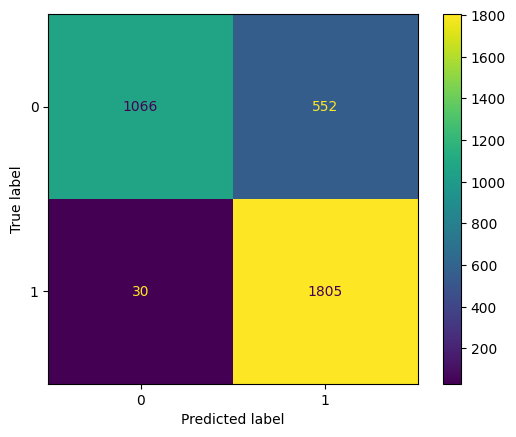

In [32]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_set, test_label)
plt.show() 

In [33]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

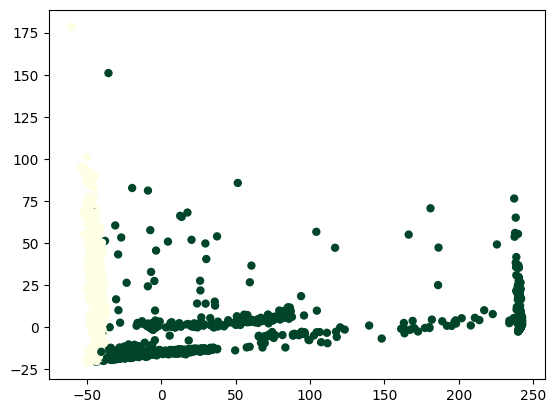

In [34]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

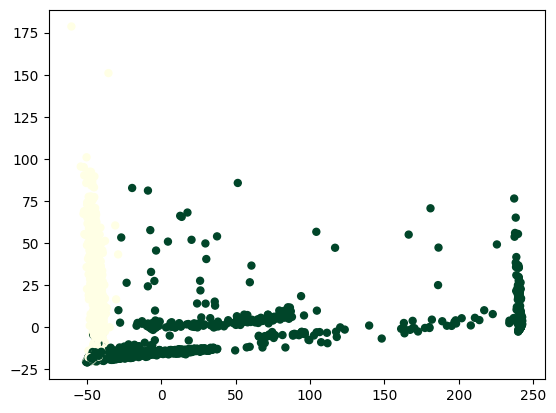

In [35]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');